In [1]:
import pandas as pd
import numpy as np

Ushbu amaliyot uchun https://en.tutiempo.net/climate/ws-384570.html sahifasidagi Toshkent shahri o'rtacha havo harorati haqidagi ma'lumotlardan foydalanamiz.

![](https://i.imgur.com/lCIRIYm.png)

## 1-VAZIFA: Sahifadagi jadvalni pandas dataframega aylantiring va:
### - Yil (`Year`) ustunini index sifatida o'qing.
### - 1990 yildan avvalgi ma'lumotlar tashlab yuboring.
### - natijani `df` degan o'zgaruvchiga saqlang

In [2]:
# JAVOBNI SHUYERGA YOZING
df=pd.read_html('https://en.tutiempo.net/climate/ws-384570.html')

In [3]:
df=df[0]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    81 non-null     int64 
 1   T       81 non-null     object
 2   TM      81 non-null     object
 3   Tm      81 non-null     object
 4   PP      81 non-null     object
 5   V       81 non-null     object
 6   RA      81 non-null     object
 7   SN      81 non-null     object
 8   TS      81 non-null     object
 9   FG      81 non-null     object
 10  TN      81 non-null     object
 11  GR      81 non-null     object
dtypes: int64(1), object(11)
memory usage: 7.7+ KB


In [4]:
df.set_index('Year',inplace=True)

In [5]:
df=df[df.index>=1990]

In [ ]:
df.head()

,T,TM,Tm,PP,V,RA,SN,TS,FG,TN,GR
Year,,,,,,,,,,,
1990,14.9,21.5,8.7,504.72,5.1,84,32,12,12,0,1
1991,14.4,21.2,8.3,460.52,5.1,77,26,15,17,0,1
1992,14.4,20.8,8.6,470.39,5.1,93,19,9,2,0,1
1993,13.4,19.6,7.6,710.97,5.4,98,38,12,10,1,0
1994,14.4,21.1,8,595.38,5.1,66,28,4,9,0,0


## 2-VAZIFA. Har bir ustun nimani anglatishi ham yuqoridagi sahifada joylashgan. Shu jadvalni ham chiqaring. Matnlarni [Google translate](https://translate.google.com) orqali tarjima qilib, uqib oling.

In [ ]:
# JAVOBNI SHUYERGA YOZING
df2=pd.read_html('https://en.tutiempo.net/climate/ws-384570.html')

In [ ]:
df2=df2[1]

In [ ]:
df2

,0,1
0,T,Average annual temperature (°C)
1,TM,Annual average maximum temperature (°C)
2,Tm,Average annual minimum temperature (°C)
3,PP,Rain or snow precipitation total annual
4,V,Annual average wind speed (km/h)
5,RA,Number of days with rain
6,SN,Number of days with snow
7,TS,Number of days with storm
8,FG,Number of foggy days
9,TN,Number of days with tornado


## 3-VAZIFA. `df`ni tahlil qilamiz

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 1990 to 2024
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T       35 non-null     object
 1   TM      35 non-null     object
 2   Tm      35 non-null     object
 3   PP      35 non-null     object
 4   V       35 non-null     object
 5   RA      35 non-null     object
 6   SN      35 non-null     object
 7   TS      35 non-null     object
 8   FG      35 non-null     object
 9   TN      35 non-null     object
 10  GR      35 non-null     object
dtypes: object(11)
memory usage: 3.3+ KB


### **SAVOL**: Yuqoridagi natijadan qanday xulosaga kelish mumkin? DF dagi sonlar bilan ishlasak bo'ladimi?

In [ ]:
#@title JAVOB:
# Afsuski, jadvalda mavjud bo'lmagan qiymatlar o'rniga tire (-) belgisi qo'yib ketilgan,
# shu sababdan jadval ustunlari son (int, float) emas matn (object) bo'lib qolgan.

## 4-VAZIFA. `df`dagi barcha `-` belgilarni `NaN` qiymat bilan almashtiring.

In [6]:
# JAVOBNI SHUYERGA YOZING
df=df.replace('-',np.nan)

## 5-VAZIFA. `df` ustunlari qiymatlarini matndan o'nlik songa (`float`) o'zgartiring.

In [7]:
# JAVOBNI SHUYERGA YOZING
df=df.astype(float)
df.head()

,T,TM,Tm,PP,V,RA,SN,TS,FG,TN,GR
Year,,,,,,,,,,,
1990,14.9,21.5,8.7,504.72,5.1,84.0,32.0,12.0,12.0,0.0,1.0
1991,14.4,21.2,8.3,460.52,5.1,77.0,26.0,15.0,17.0,0.0,1.0
1992,14.4,20.8,8.6,470.39,5.1,93.0,19.0,9.0,2.0,0.0,1.0
1993,13.4,19.6,7.6,710.97,5.4,98.0,38.0,12.0,10.0,1.0,0.0
1994,14.4,21.1,8.0,595.38,5.1,66.0,28.0,4.0,9.0,0.0,0.0


## 6-VAZIFA. `NaN` qiymatlar bilan ishlaymiz
### 6.1. Har bir ustundagi `NaN` qiymatlar soni va ularning proprosiyasini toping.

In [8]:
# JAVOBNI SHUYERGA YOZING
df.isna().sum()/len(df)*100

,0
T,14.285714
TM,14.285714
Tm,14.285714
PP,71.428571
V,14.285714
RA,11.428571
SN,11.428571
TS,11.428571
FG,11.428571
TN,11.428571


### 6.2. Eng ko'p `nan` qiymat mavjud ustunni tashlab yuboring va natijani saqlab qoling.

In [9]:
# JAVOBNI SHUYERGA YOZING
df = df.drop(df.isna().sum().idxmax(), axis=1)
df.head()

,T,TM,Tm,V,RA,SN,TS,FG,TN,GR
Year,,,,,,,,,,
1990,14.9,21.5,8.7,5.1,84.0,32.0,12.0,12.0,0.0,1.0
1991,14.4,21.2,8.3,5.1,77.0,26.0,15.0,17.0,0.0,1.0
1992,14.4,20.8,8.6,5.1,93.0,19.0,9.0,2.0,0.0,1.0
1993,13.4,19.6,7.6,5.4,98.0,38.0,12.0,10.0,1.0,0.0
1994,14.4,21.1,8.0,5.1,66.0,28.0,4.0,9.0,0.0,0.0


### 6.3. Qolgan `NaN` qiymatlarni o'zingiz to'g'ri deb bilgan usulda to'ldiring (tashlab yubormang) va natijani saqlab qoling.

In [10]:
# JAVOBNI SHUYERGA YOZING
df=df.fillna(method='ffill')

<ipython-input-10-1d23daacd92b>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=df.fillna(method='ffill')


### 6.4. Yakuniy `df` ni csv faylga saqlab, kompyuterga (yoki githubga) yuklab oling (keyingi darsda ishlatamiz)

In [11]:
# JAVOBNI SHUYERGA YOZING
df.to_csv('Weather.csv')

##7-VAZIFA. Chiziqli grafiklar

### 7.1. `df`dan yillik o'rtacha haroratni ko'rsatuvchi ustunni `x` o'zgaruvchiga saqlang va `plt.plot()` yordamida chiziqli grafik chizing.

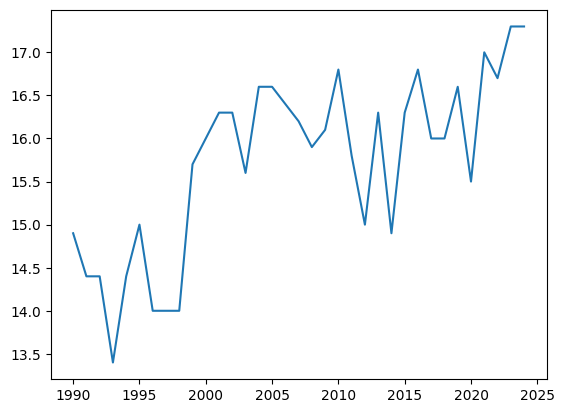

In [12]:
import matplotlib.pyplot as plt
x=df['T']
plt.plot(x)

### 7.2. Yuqoridagi grafikni hajmini kattalashtiring, chiziq qalingligi, turi, rangi, markerlar turini istalgancha o'zgartiring

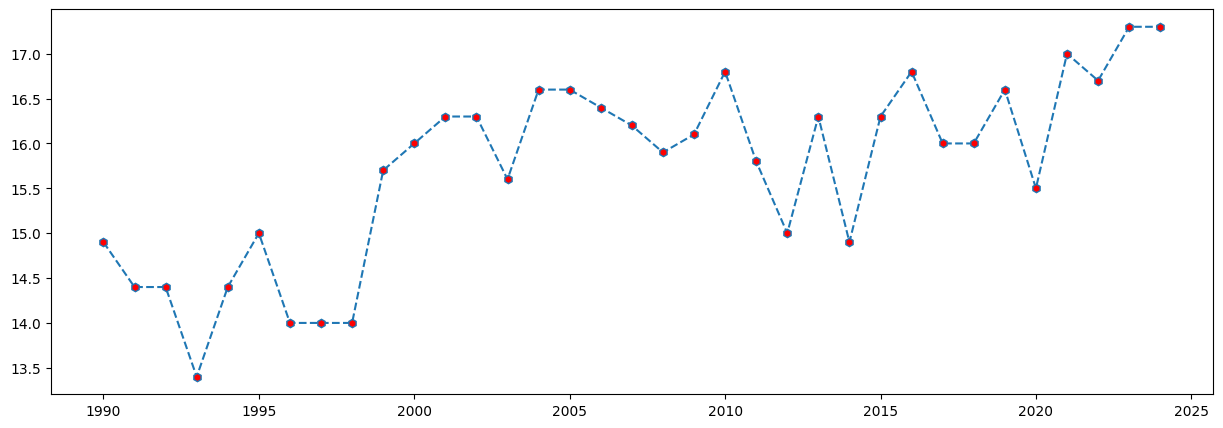

In [13]:
# JAVOBNI SHUYERGA YOZING
plt.figure(figsize=(15,5))
plt.plot(x,linestyle='--',marker='h',markerfacecolor='r')

### 7.3. Yuqoridagi grafikda x va y o'qlarini nomlang, grafikka ham umumiy nom bering

Text(0, 0.5, 'Toshkent_Harorati')

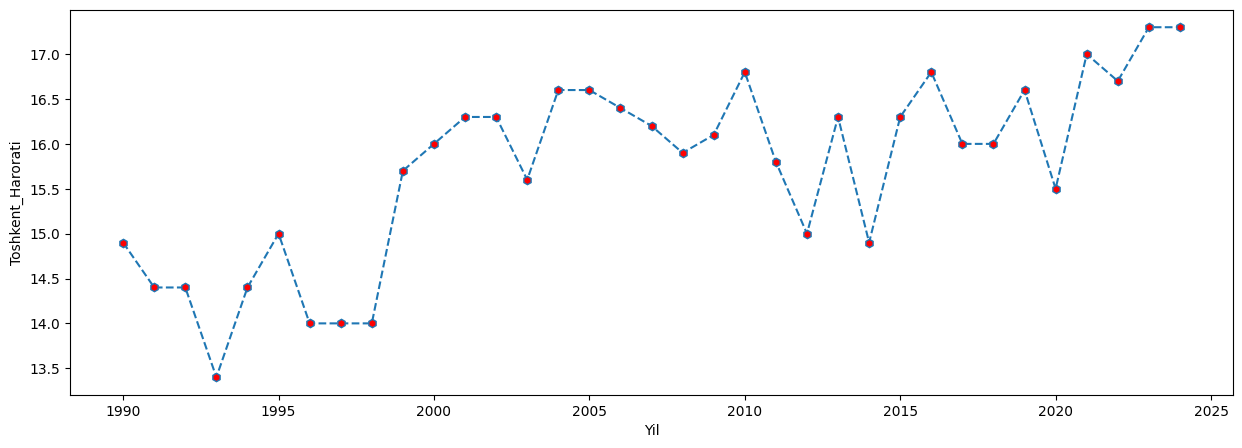

In [14]:
# JAVOBNI SHUYERGA YOZING
plt.figure(figsize=(15,5))
plt.plot(x,linestyle='--',marker='h',markerfacecolor='r')
plt.xlabel('Yil')
plt.ylabel('Toshkent_Harorati')

## 8-VAZIFA. Toshkent shahri uchun, har bir yilda o'rtacha min va max haroratlarni ko'rsatuvchi grafik chizing. **Grafikni faylga saqlab oling**

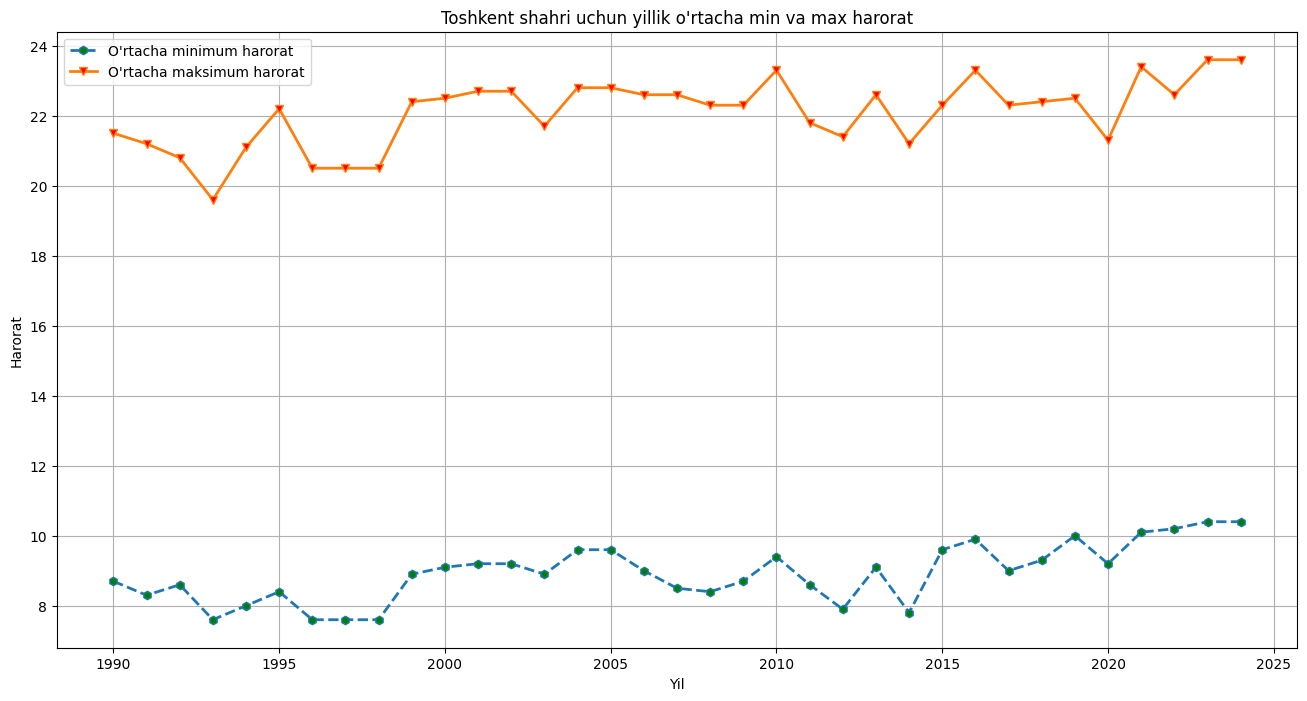

In [15]:
# JAVOBNI SHUYERGA YOZING
minT = df['Tm']
maxT = df['TM']
plt.figure(figsize=(16,8))
plt.plot(minT, linewidth=2, linestyle="--", marker='h', markerfacecolor='g', label="O'rtacha minimum harorat")
plt.plot(maxT, linewidth=2, linestyle="-", marker='v', markerfacecolor='r', label="O'rtacha maksimum harorat")
plt.grid()
plt.legend()
plt.title("Toshkent shahri uchun yillik o'rtacha min va max harorat")
plt.xlabel("Yil")
plt.ylabel("Harorat")
plt.savefig('tempMinMax.png')
plt.show()

## 9-VAZIFA. Faylga saqlangan grafikni ochib ko'ring.

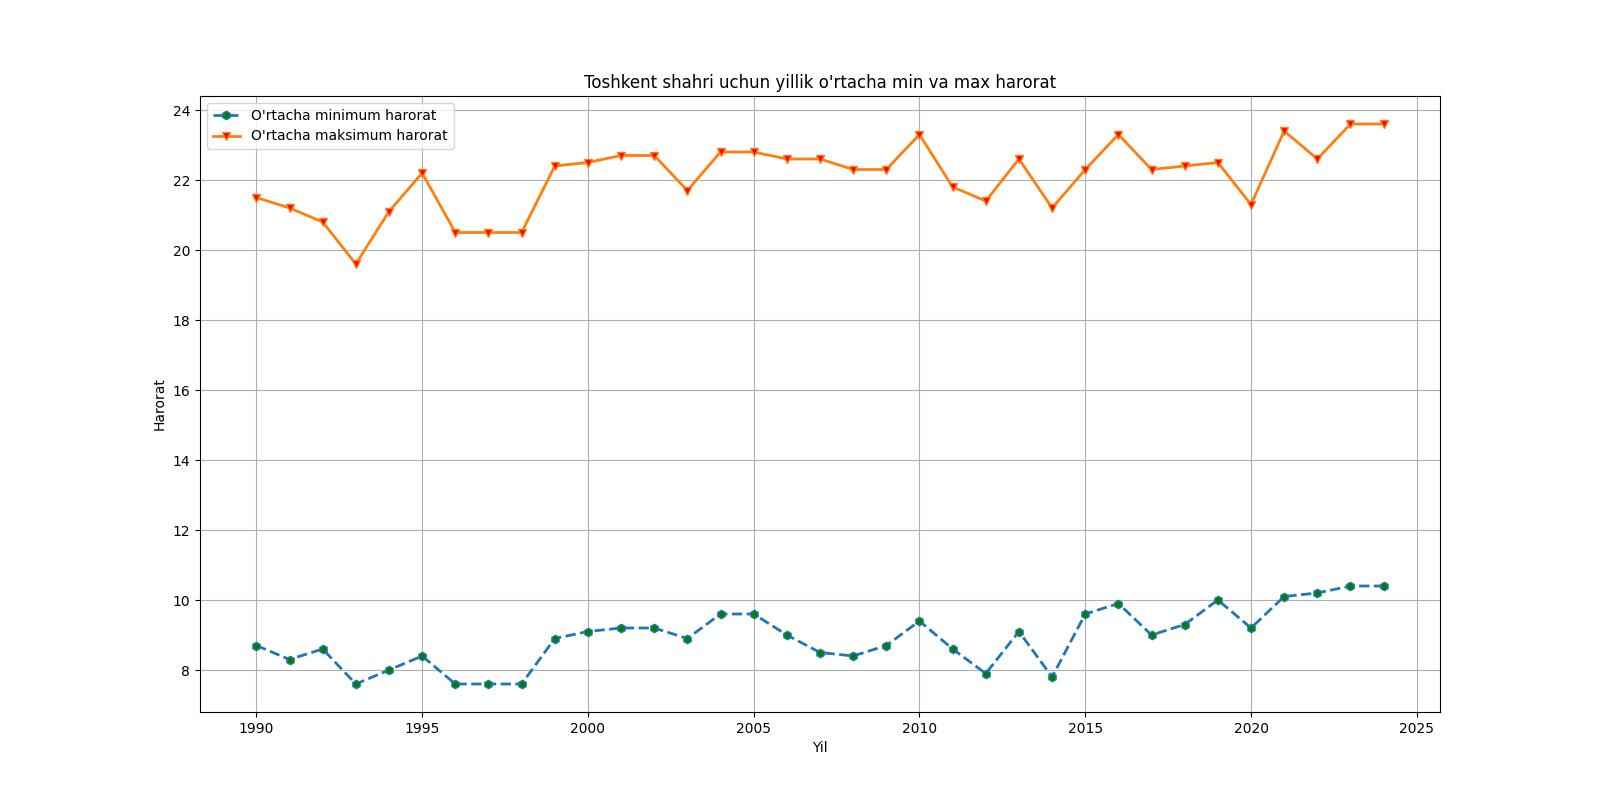

In [19]:
# JAVOBNI SHUYERGA YOZING
from IPython.display import Image

Image('/content/tempMinMax.png')